In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (10,6)
from gdsctools import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
gdsc = ANOVA(ic50_test)

TISSUE FACTOR : included
MEDIA FACTOR : NOT included
MSI FACTOR : included
FEATURE FACTOR : included


In [3]:
gdsc.tissue_factor.unique()

array(['lung_NSCLC', 'prostate', 'stomach', 'nervous_system', 'skin',
       'Bladder', 'leukemia', 'kidney', 'thyroid', 'soft_tissue',
       'aero_dig_tract', 'ovary', 'lymphoma', 'myeloma', 'endometrium',
       'pancreas', 'breast', 'neuroblastoma', 'large_intestine', 'cervix',
       'liver', 'bone', 'lung_SCLC', 'lung', 'biliary_tract',
       'urogenital_system_other', 'testis'], dtype=object)

In [4]:
print(gdsc)

Number of drugs: 11
Number of cell lines: 988
Percentage of NA 0.206569746043

Genomic features distribution
Number of unique tissues 27
Here are the first 10 tissues: lung_NSCLC, prostate, stomach, nervous_system, skin, Bladder, leukemia, kidney, thyroid, soft_tissue
MSI column: yes
MEDIA column: no

There are 47 unique features distributed as
- Mutation: 47
- CNA (gain): 0
- CNA (loss): 0


There are 27 different tissues in this original data

## Select sub set of cancers

What about an analysis on only stomach and pancreas:

In [5]:
gdsc.set_cancer_type(['pancreas', 'stomach'])

In [6]:
print(gdsc)

Number of drugs: 11
Number of cell lines: 61
Percentage of NA 0.241430700447

Genomic features distribution
Number of unique tissues 2
Here are the tissues: stomach,pancreas
MSI column: yes
MEDIA column: no

There are 24 unique features distributed as
- Mutation: 24
- CNA (gain): 0
- CNA (loss): 0


The number of cell lines has decreased significanly, which is expected.
Also, the number of features has decreased! 

Indeed, features that do not have at least 1 positive or 1
negative. Note that later, further features may be ignored based on the content of the settings.featFactorPopulationTh

In [7]:
# because we have more than one tissue, the analysis type is still PANCAN
gdsc.settings.analysis_type

'PANCAN'

In [8]:
results = gdsc.anova_one_drug_one_feature('Drug_1047_IC50', 'ACACA_mut', 
                                     show=True)

In [9]:
# Nothing happens here, let us look at the content of the result
results

,ANOVA_FEATURE_FDR,ANOVA_FEATURE_pval,ANOVA_MEDIA_pval,ANOVA_MSI_pval,ANOVA_TISSUE_pval,ASSOC_ID,DRUG_ID,DRUG_NAME,DRUG_TARGET,FEATURE,...,FEATURE_IC50_effect_size,FEATURE_delta_MEAN_IC50,FEATURE_neg_Glass_delta,FEATURE_neg_IC50_sd,FEATURE_neg_logIC50_MEAN,FEATURE_pos_Glass_delta,FEATURE_pos_IC50_sd,FEATURE_pos_logIC50_MEAN,N_FEATURE_neg,N_FEATURE_pos
1,None,None,None,None,None,None,Drug_1047_IC50,None,None,ACACA_mut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,1


most of the columns are NA. This means that nothing was computed. Most probably because the MSI or 
feature balance are not good enough

Let us try another feature

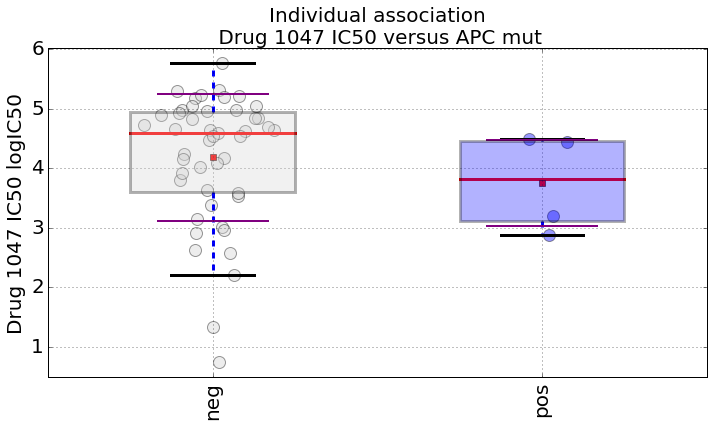

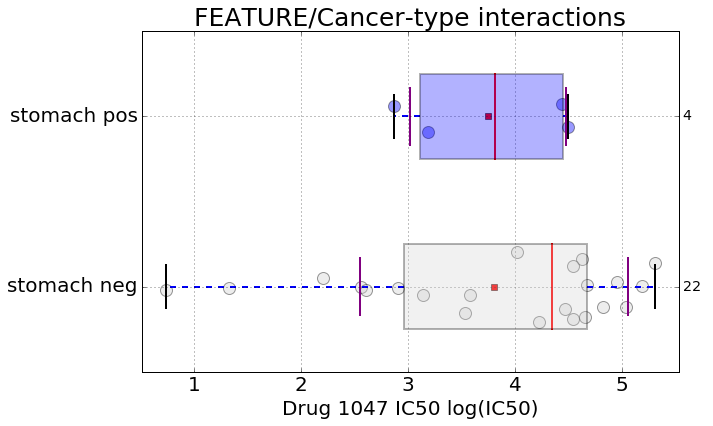

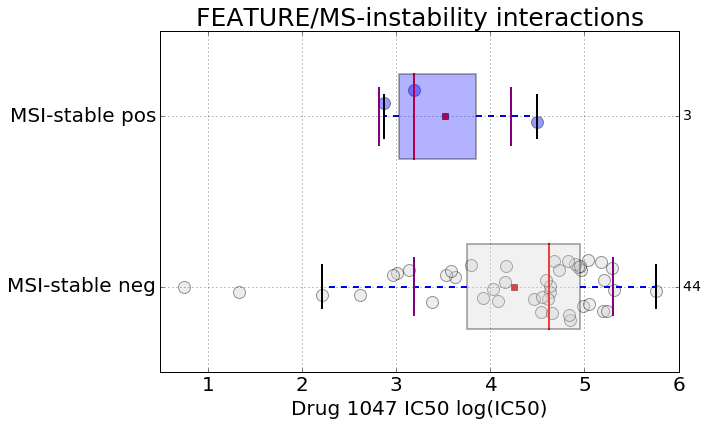

In [10]:
results = gdsc.anova_one_drug_one_feature('Drug_1047_IC50', 'APC_mut', 
                                     show=True)

## Cancer Specific

In [11]:
gdsc.set_cancer_type('stomach')

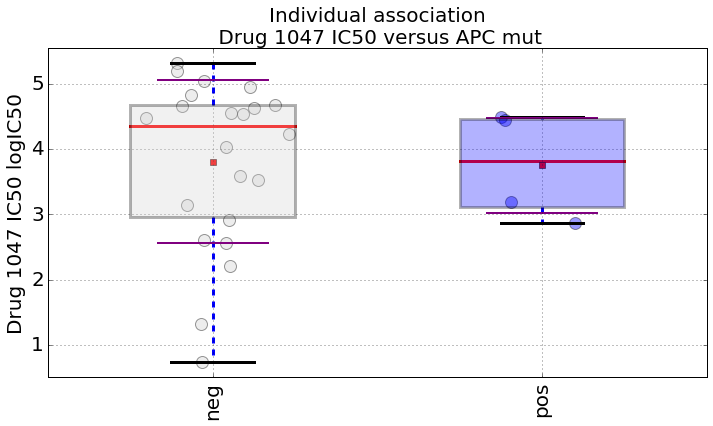

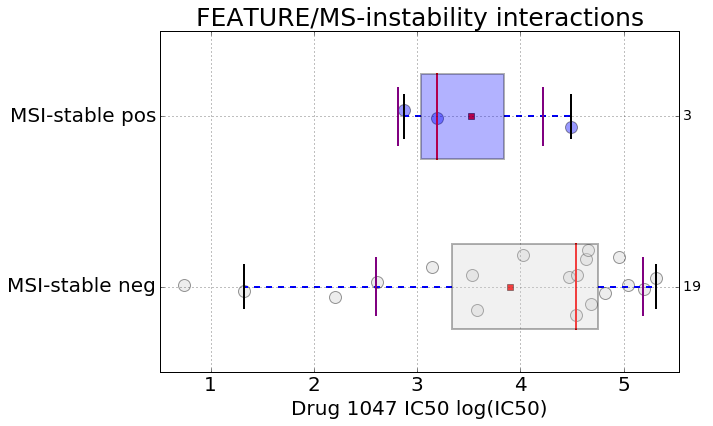

In [12]:
results = gdsc.anova_one_drug_one_feature('Drug_1047_IC50', 'APC_mut', 
                                     show=True)

note that there are only 2 boxplots now since the tissue-specific factor has been dropped

<hr>
<ht>
**Author: Thomas Cokelaer, Nov 2015**